# 三维向量

- 三维绘图
- 三维向量
- 三维向量计算
  - 三维向量长度
  - 三维向量相加 (相减)
  - 三维向量和标量相乘
- 球坐标

In [1]:
try:
    import sys
    # 将项目根路径加入系统路径集合, 即可以引入相关的包
    sys.path.append("../..")
finally:
    pass

# 引入所需的包
from common import Vector3D
from common.vector_draw import draw3d, Color, Points3D, Arrow3D, Segment3D, Box3D
from math import sqrt, sin, cos, pi
from typing import Iterator 


## 1. 在三维坐标系绘图


**练习:** 绘制一个空的三维坐标系


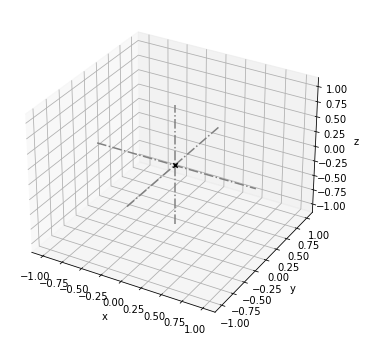

In [2]:
draw3d()


**练习:** 在三维坐标系中绘制点

绘制 `(2, 2, 2)` 和 `(1, -2, -2)` 两个点


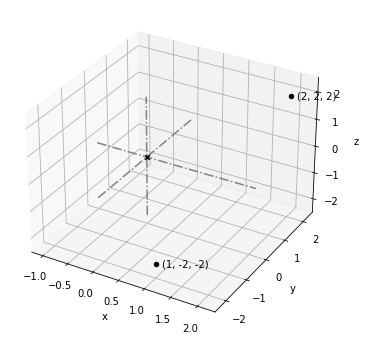

In [3]:
# 两个点的坐标
v1, v2 = (2, 2, 2), (1, -2, -2)

draw3d(
    Points3D(v1, v2),  # 绘制两个点
)


**练习:** 在三维坐标系中绘制点和线段

绘制 `(2, 2, 2)` 和 `(1, -2, -2)` 两个点, 并用线段连接, 最后用箭头从原点指向这两个点


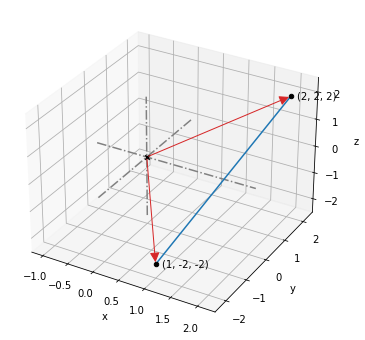

In [4]:
# 两个点的坐标
v1, v2 = (2, 2, 2), (1, -2, -2)

draw3d(
    Points3D(v1, v2),  # 绘制两个点
    Segment3D(v1, v2),  # 绘制连接两个点的线段
    Arrow3D(v1),  # 绘制原点到 v1 点的箭头
    Arrow3D(v2),  # 绘制原点到 v2 点的箭头
)


**练习:** 在三维坐标系中绘制点和线段, 并绘制坐标点和轴组成的立方体

绘制 `(2, 2, 2)` 和 `(1, -2, -2)` 两个点, 并用线段连接, 最后用箭头从原点指向这两个点


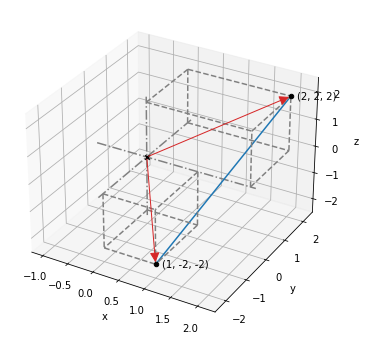

In [5]:
# 两个点的坐标
v1, v2 = (2, 2, 2), (1, -2, -2)

draw3d(
    Points3D(v1, v2),  # 绘制两个点
    Segment3D(v1, v2),  # 绘制连接两个点的线段
    Arrow3D(v1),  # 绘制原点到 v1 点的箭头
    Arrow3D(v2),  # 绘制原点到 v2 点的箭头
    Box3D(*v1),  # 绘制 v1 点和坐标轴组成的立方体
    Box3D(*v2),  # 绘制 v2 点和坐标轴组成的立方体
)


**练习:** 绘制表示坐标 `(-1, -2, 2)` 的点和三维箭头, 以及使箭头更立体的虚线框


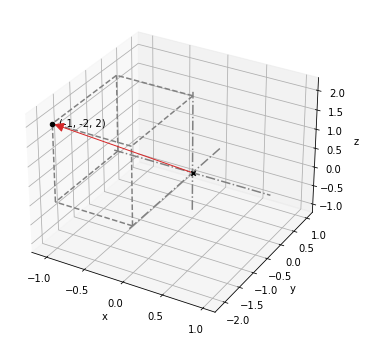

In [6]:
# 要绘制的三维向量
v = (-1, -2, 2)

# 绘制图形
draw3d(
    Points3D(v),  # 绘制点
    Arrow3D(v),  # 绘制原点到坐标点的箭头
    Box3D(*v),  # 绘制坐标点和坐标轴组成的立方体
)


**练习:** 有 `8` 个三维向量的坐标都是 `+1` 或 `-1`. 例如 `(1, -1, 1)` 就是其中之一. 将这 `8` 个向量绘制成点, 然后想办法通过线段将它们连接到一起, 以形成立方体的轮廓


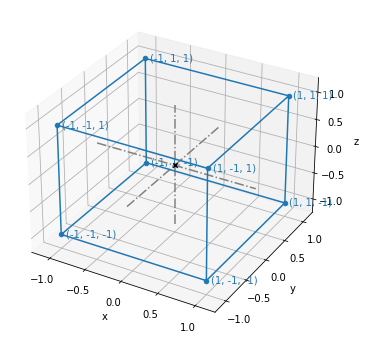

In [7]:
pm1 = [1, -1]

# 穷举 1, -1 两个数, 产生 8 个端点
# [
#   (1, 1, 1),
#   (1, 1, -1),
#   (1, -1, 1),
#   (1, -1, -1),
#   (-1, 1, 1),
#   (-1, 1, -1),
#   (-1, -1, 1),
#   (-1, -1, -1),
# ]
vertices = [(x, y, z) for x in pm1 for y in pm1 for z in pm1]

# 穷举 1, -1 两个数, 产生连接 8 个端点的 12 条线段
# 每组循环产生 4 组线段
# [
#   ((-1, 1, 1), (1, 1, 1)),
#   ((-1, 1, -1), (1, 1, -1)),
#   ((-1, -1, 1), (1, -1, 1)),
#   ((-1, -1, -1), (1, -1, -1)),
#   ((1, -1, 1), (1, 1, 1)),
#   ((1, -1, -1), (1, 1, -1)),
#   ((-1, -1, 1), (-1, 1, 1)),
#   ((-1, -1, -1), (-1, 1, -1)),
#   ((1, 1, -1), (1, 1, 1)),
#   ((1, -1, -1), (1, -1, 1)),
#   ((-1, 1, -1), (-1, 1, 1)),
#   ((-1, -1, -1), (-1, -1, 1)),
# ]
edges = (
    [((-1, y, z), (1, y, z)) for y in pm1 for z in pm1] +
    [((x, -1, z), (x, 1, z)) for x in pm1 for z in pm1] +
    [((x, y, -1), (x, y, 1)) for x in pm1 for y in pm1]
)

# 绘制图形
draw3d(
    Points3D(*vertices, color=Color.blue),  # 绘制 8 个端点
    *[Segment3D(*edge) for edge in edges],  # 绘制 12 条线段
)


## 2. 3D 向量运算


### 2.1. 向量加法


**知识:** 两个 3D 向量相加仍是将向量的各个对应分量进行相加, 例如 `(2, 1, 1)` 和 `(1, 2, 2)` 相加为 `(2+1, 1+2, 1+2) = (3, 3, 3)`


In [8]:
def add3d(v1: Vector3D, v2: Vector3D) -> Vector3D:
    """
    将两个三维向量进行相加

    Args:
        v1 (Vector3D): 相加的两个三维向量之一
        v2 (Vector3D): 相加的两个三维向量之一

    Returns:
        Vector3D: 向量相加之和
    """
    return tuple(n1 + n2 for n1, n2 in zip(v1, v2))


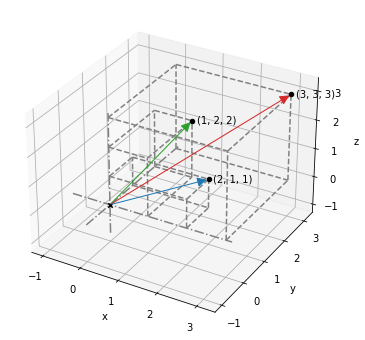

In [9]:
v1, v2 = (2, 1, 1), (1, 2, 2)

# 计算两个向量的和
vr = add3d(v1, v2)

# 绘制向量
draw3d(
    Points3D(v1, v2, vr),
    Arrow3D(v1, color=Color.blue),
    Arrow3D(v2, color=Color.green),
    Arrow3D(vr, color=Color.red),
    Box3D(*v1),
    Box3D(*v2),
    Box3D(*vr),
)


三维向量相加, 从图形表示上, 相当于将被加的两个向量首尾相接, 即得到结果向量


**练习:** 绘制 `(4, 0, 3)` 和 `(-1, 0, 1)` 两个向量, 使它们在三维空间中以两种顺序首尾相接. 求向量和

结果图中, 红色和蓝色箭头首尾相接的结果即为向量和 (紫色箭头)

首尾相接表现了向量加法的交换律, 即 $(4, 0, 3) + (-1, 0, 1) = (-1, 0, 1) + (4, 0, 3) = (3, 0, 4)$

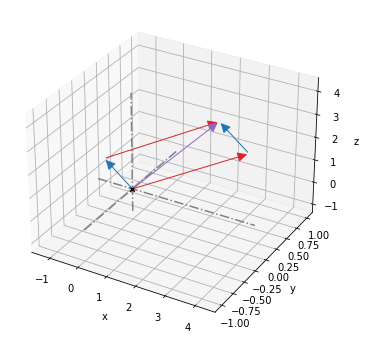

In [10]:
# 两个向量
v1, v2 = (4, 0, 3), (-1, 0, 1)

# 两个向量的和
vr = add3d(v1, v2)

# 绘制图形
draw3d(
    Arrow3D(v1, color=Color.red),  # 向量 1
    Arrow3D(v2, color=Color.blue),  # 向量 2
    Arrow3D(vr, v1, color=Color.blue),  # 从向量 1 到向量和, 表示向量 1 和向量 2 首位相接
    Arrow3D(vr, v2, color=Color.red),  # 从向量 2 到向量和, 表示向量 2 和向量 1 首位相接
    Arrow3D(vr, color=Color.purple),  # 向量和
)


**练习:** 一个包含 `24` 个向量的列表 `[(sin(pi * t / 6), cos(pi * t / 6), 1.0 / 3) for t in range(0,24)]`

求: 这 `24` 个向量的和是多少? 把这 `24` 个向量绘制成首尾相接的图形

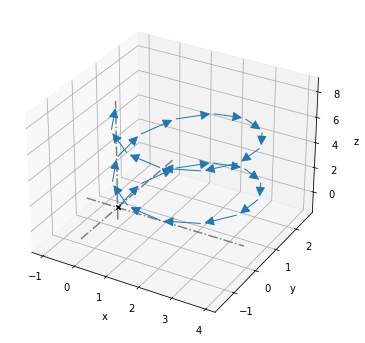

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


In [11]:
# 预设的向量集合
vs = [(sin(pi * t / 6), cos(pi * t / 6), 1.0 / 3) for t in range(0, 24)]

# 保存箭头图形的列表
arrows = []

# 保存向量和的向量
vr = (0, 0, 0)

# 遍历所有向量
for v in vs:
    # 计算当前向量和之前向量的总和
    next_vr = add3d(vr, v)
    # 产生从当前当前向量和到前一个向量和之间的箭头
    arrows.append(Arrow3D(next_vr, vr, color=Color.blue))
    vr = next_vr

# 绘制向量
draw3d(
    *arrows,
)

# 输出向量和
print(vr)


### 2.2. 标量乘法


**知识:** 三维向量 $v = (1, 2, 3)$ 乘以标量 `2` 的结果为 $vr = (2, 4, 6)$, 结果向量和原向量方向一致, 长度为之前的 `2` 倍


In [12]:
def scale3d(v: Vector3D, scalar: float) -> Vector3D:
    """
    三维向量乘以一个标量

    Args:
        v (Vector3D): 三维向量
        scalar (float): 标量

    Returns:
        Vector3D: 向量和标量的乘积 
    """
    return tuple(scalar * coord for coord in v)


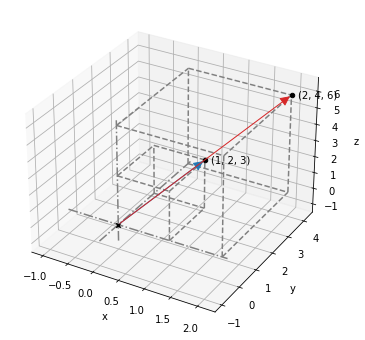

In [13]:
v = (1, 2, 3)

# 计算向量和标量的乘积
vr = scale3d(v, 2)

# 绘制向量
draw3d(
    Points3D(v, vr),
    Arrow3D(v, color=Color.blue),
    Arrow3D(vr, color=Color.red),
    Box3D(*v),
    Box3D(*vr),
)


### 2.3. 向量减法


**知识:** 两个三维向量 $v$ 和 $w$ 相减, 称为**位移**, 将 $v$ 和 $w$ 看作从原点出发的箭头, 那么 $v - w$ 的差值也是一个箭头，它的头部位于 $v$ 的头部，尾部位于 $w$ 的头部, 它既是 $v$ 到 $w$ 的箭头, 本身也是一个点

计算 $v1 = (-1, -3, 3)$ 和 $v2 = (3, 2, 4)$ 的差值


In [14]:
def minus3d(v1: Vector3D, v2: Vector3D) -> Vector3D:
    """
    两个三维向量相减

    Args:
        v1 (Vector3D): 被减数向量
        v2 (Vector3D): 减数向量

    Returns:
        Vector3D: 相减的结果
    """
    return tuple(n1 - n2 for n1, n2 in zip(v1, v2))


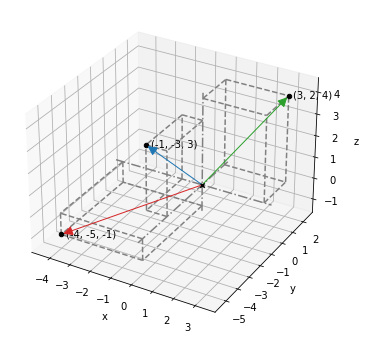

In [15]:
v1, v2 = (-1, -3, 3), (3, 2, 4)

# 计算两个向量的差
vr = minus3d(v1, v2)

# 绘制向量
draw3d(
    Points3D(v1, v2, vr),
    Arrow3D(v1, color=Color.blue),
    Arrow3D(v2, color=Color.green),
    Arrow3D(vr, color=Color.red),
    Box3D(*v1),
    Box3D(*v2),
    Box3D(*vr),
)


**练习:** 设 $u = (1, -1, -1)$ 和 $v = (0, 0, 2)$. 则 $u + 1/2(v - u)$ 的结果是什么?

可以看到, 计算结果 `(0.5, -0.5, 0.5)` 恰好在两个向量的坐标点之间

Result is: (0.5, -0.5, 0.5)


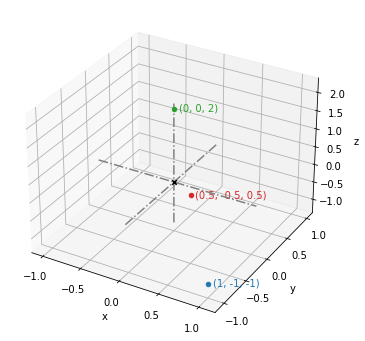

In [16]:
u, v = (1, -1, -1), (0, 0, 2)

# 计算结果
vr = minus3d(v, u)
vr = scale3d(vr, 1 / 2)
vr = add3d(u, vr)

print(f"Result is: {vr}")

# 绘制图形
draw3d(
    Points3D(u, color=Color.blue),  # 绘制向量 u
    Points3D(v, color=Color.green),  # 绘制向量 v
    Points3D(vr, color=Color.red),  # 绘制计算结果向量
)


### 2.3. 三维向量长度

**知识:** 三维向量长度和二维向量类似, 只是额外需要考虑 `z` 坐标

计算公式为: $\sqrt{(\sqrt{x^2 + y^2})^2 + z^2} = \sqrt{x^2 + y^2 + z^2}$

In [17]:
def length3d(v: Vector3D) -> float:
    """
    计算三维向量的长度

    Args:
        v (Vector3D): 三维向量值

    Returns:
        float: 向量长度
    """
    return sqrt(sum(coord ** 2 for coord in v))


In [18]:
length3d((3, 4, 12))


13.0

**练习:** 坐标 `3`, `4` 和 `12` 能以任意顺序创建一个向量, 其长度是整数 `13`. 这很不寻常, 因为大多数数不是完全平方数, 所以长度公式中的平方根通常返回无理数. 找出另一组三个整数, 以它们为坐标定义的向量也有整数长度.

In [19]:
def vectors_with_whole_number_length(max_coord=100) -> Iterator[Vector3D]:
    """
    计算在一个坐标值范围内, 长度为整数的向量

    Args:
        max_coord (int, optional): 最大坐标范围. Defaults to `100`.

    Yields:
        Iterator[Vector3D]: 符合条件的向量集合
    """
    for x in range(1, max_coord):
        for y in range(1, x + 1):
            for z in range(1, y + 1):  # 穷举三个坐标轴的
                coord = (x, y, z)
                # 判断向量长度是否为整数
                if length3d(coord).is_integer():
                    yield coord


In [20]:
list(vectors_with_whole_number_length())

[(2, 2, 1),
 (4, 4, 2),
 (6, 3, 2),
 (6, 6, 3),
 (7, 4, 4),
 (7, 6, 6),
 (8, 4, 1),
 (8, 8, 4),
 (9, 6, 2),
 (10, 10, 5),
 (11, 10, 2),
 (12, 4, 3),
 (12, 6, 4),
 (12, 9, 8),
 (12, 12, 1),
 (12, 12, 6),
 (14, 5, 2),
 (14, 8, 8),
 (14, 12, 12),
 (14, 14, 7),
 (15, 10, 6),
 (16, 8, 2),
 (16, 11, 8),
 (16, 13, 4),
 (16, 15, 12),
 (16, 16, 8),
 (17, 6, 6),
 (18, 6, 1),
 (18, 9, 6),
 (18, 12, 4),
 (18, 13, 6),
 (18, 14, 3),
 (18, 18, 9),
 (19, 8, 4),
 (20, 5, 4),
 (20, 12, 9),
 (20, 20, 10),
 (20, 20, 17),
 (21, 12, 12),
 (21, 16, 12),
 (21, 18, 14),
 (21, 18, 18),
 (22, 6, 3),
 (22, 14, 7),
 (22, 20, 4),
 (22, 21, 6),
 (22, 22, 11),
 (23, 10, 10),
 (23, 14, 2),
 (24, 8, 6),
 (24, 12, 3),
 (24, 12, 8),
 (24, 12, 11),
 (24, 16, 3),
 (24, 18, 16),
 (24, 24, 2),
 (24, 24, 12),
 (24, 24, 23),
 (25, 10, 2),
 (25, 20, 8),
 (26, 7, 2),
 (26, 18, 15),
 (26, 22, 19),
 (26, 26, 13),
 (27, 14, 6),
 (27, 18, 6),
 (27, 24, 8),
 (28, 10, 4),
 (28, 16, 7),
 (28, 16, 16),
 (28, 17, 4),
 (28, 21, 12),
 (28,

**练习:** 找到一个与 `(-1, -1, 2)` 方向相同但长度为 `1` 的向量

提示：找到合适的标量与原向量相乘，以适当地改变其长度

Length is: 2.449489742783178
1/length is: 0.4082482904638631
New vector is: (-0.4082482904638631, -0.4082482904638631, 0.8164965809277261)


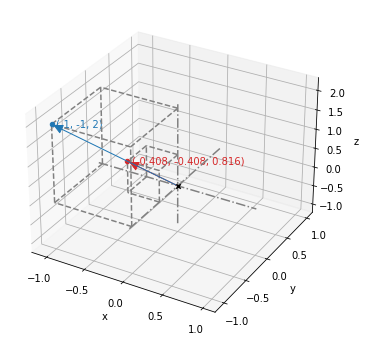

In [21]:
# 原始向量
v = (-1, -1, 2)

# 求原始向量的长度
length = length3d(v)
print(f"Length is: {length}")

# 求新向量和原始向量长度的比例
s = 1 / length
print(f"1/length is: {s}")

# 利用向量和标量的乘法, 计算新向量
v_new = scale3d(v, s)
print(f"New vector is: {v_new}")

# 绘制向量
draw3d(
    Points3D(v, color=Color.blue),
    Points3D(v_new, color=Color.red),
    Arrow3D(v, color=Color.blue),
    Arrow3D(v_new, color=Color.red),
    Box3D(*v),
    Box3D(*v_new),
)


## 球坐标

**知识:** 通过角度和长度确定三维向量

三维向量可以被看作箭头或者沿一定方向发生的一定长度的位移. 在三维空间中, 需要通过两个角度来确定向量的方向
- 第一个角度 $\phi$ 为向量和 $x$ 轴正方向的夹角
- 第一个角度 $\theta$ 为向量和 $z$ 轴正方向的夹角

![两个角度共同指定三维向量的方向](../assets/spherical_coords.jpeg)

向量的长度用 $r$ 来表示，它与角度 $\phi$ 和 $\theta$ 一起可以描述三维空间中的任何向量. $r$, $\phi$ 和 $\theta$ 这三个数组成了球坐标系